

#  (FBI Gun Dataset)



<a id='intro'></a>
## Introduction
The FBI dataset displays a plenty of measurements that allows us to predict the moving average and its direction of gun policy; in the US as the second amendment to keep and bear arms, gun ownership shows a noticeable rise in all over the States with a variety of collections.Years moving forward as well appears to be an independent variable that impacts gun increase with others have hand in such as population growth.In this data investigate, there will be visualizations, observations, and findings answering the questions bellow.   

## Questions:

Has the moving average of gun totals increased over the years in the US?

How did the average of gun permits change between 1998-2017?

In [52]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> First I saved my files to csv so they can be readable.
>
>
>then I had to figure out the columns needed
>
>
>replaced 0 to null and got rid of null to avoid missing values
>
>
>Split month to use year in vizualisations
>
>
>renamed columns to be callable
>
>
>Converted year from object to datetime. 


In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gun = pd.read_csv ("gun-data (1).csv")


### Data Cleaning (Reading files for dataset)

In [54]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [55]:
###(to check data needed)

In [56]:
columns_reqd=['state','month','permit','totals']
gun= gun[columns_reqd]
gun.head()

,state,month,permit,totals
0,Alabama,2017-09,16717.0,32019
1,Alaska,2017-09,209.0,6303
2,Arizona,2017-09,5069.0,28394
3,Arkansas,2017-09,2935.0,17747
4,California,2017-09,57839.0,123506


In [57]:
###(picked out data required)

In [58]:
gun['totals'] = gun['totals'].replace(0, np.NaN)
gun['permit'] = gun['permit'].replace(0, np.NaN)

In [59]:
###(replace zero values to null)

In [60]:
gun['month'] = (gun['month'].str.split('-', expand=True))
gun.head()

,state,month,permit,totals
0,Alabama,2017,16717.0,32019.0
1,Alaska,2017,209.0,6303.0
2,Arizona,2017,5069.0,28394.0
3,Arkansas,2017,2935.0,17747.0
4,California,2017,57839.0,123506.0


In [61]:
###(only year needed for visualization so I split '-' to remove month)

In [62]:
gun.rename(columns={'month':'year'}, inplace=True)
gun.head()

,state,year,permit,totals
0,Alabama,2017,16717.0,32019.0
1,Alaska,2017,209.0,6303.0
2,Arizona,2017,5069.0,28394.0
3,Arkansas,2017,2935.0,17747.0
4,California,2017,57839.0,123506.0


In [63]:
###(renamed month column because it's year now)

In [64]:
gun.dtypes

state      object
year       object
permit    float64
totals    float64
dtype: object

In [65]:
###(check data type)

In [66]:
gun['year']= pd.to_datetime(gun['year'])

In [67]:
###(converted year from object to date time )

In [68]:
gun.dtypes

state             object
year      datetime64[ns]
permit           float64
totals           float64
dtype: object

In [69]:
gun.isnull().sum()

state        0
year         0
permit    4756
totals     265
dtype: int64

In [70]:
###(check null value)

In [71]:
gun.shape

(12485, 4)

In [72]:
###(check number of columns and rows)

In [73]:
gun.dropna(subset=['permit'], inplace=True)
gun.dropna(subset=['totals'], inplace=True)

In [74]:
###(drop null in permit and totals)

In [75]:
gun.isnull().sum()

state     0
year      0
permit    0
totals    0
dtype: int64

In [76]:
gun.shape

(7729, 4)



### Has the moving average of gun totals increased over the years in the US?

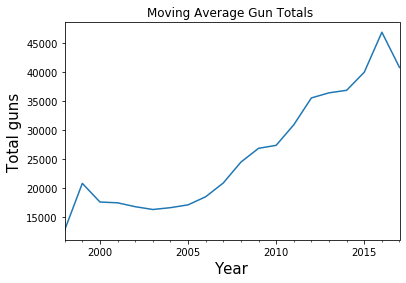

In [77]:
avg_gun = gun.groupby('year')['totals'].agg('mean')
avg_gun.plot()
plt.xlabel("Year", fontsize =15)
plt.ylabel("Total guns", fontsize =15)
plt.title('Moving Average Gun Totals ')
plt.show()

# Observation and findings:
As can be seen in this chart, the five-year moving average of total guns in the US kept heading up since 2005.It had a slight decrease a little before 2000 untill a few years before 2005.After that it had gone up fast until it peaked in 2015.Also, there was an appearent decrease after 2015. 


### How did the average of gun permits change between 1998-2017?

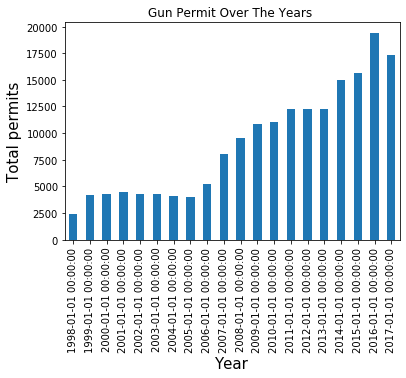

In [78]:
avg_permit = gun.groupby('year')['permit'].agg('mean')
avg_permit.plot(kind='bar')
plt.xlabel("Year", fontsize =15)
plt.ylabel("Total permits", fontsize =15)
plt.title('Gun Permit Over The Years ')
plt.show()

# Observation and findings: 
In this chart, gun permit is clearly rising since 1998 there had been a few years that it went a little down; however most years makes it look it has always been increasing. since 1998 untill 2007 gun permits had tripled and then from 2007 to 2017 almost tipled again, which can be interpreted that permits would keep escalating in the future of the US.  


# Conclusion:
After discussing guns in the US, and their direction regarding permits and totals, it can be obviously seen that guns would spread out more.Total guns went from 15000 to 45000 in less than 20 years as well as permit guns over the years.Also, it means there are more guns were unpermitted. proportionately, they both have tripled in the last two decades with the numbers totals show, it might reach more than 100,000 in the next decade. Therefore, permitted and unpermitted guns will keep increasing until other laws applied.  